In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

In [3]:
# https://www.donneesquebec.ca/recherche/fr/dataset/rapports-d-accident
df = pd.read_csv('https://saaq.gouv.qc.ca/donnees-ouvertes/rapports-accident/rapports-accident-2016.csv')

In [4]:
# Montreal accidents only & select columns
mtl = df.loc[df['REG_ADM'] == 'Montréal(06)', ['REG_ADM', 'heure_accdn', 'JR_SEMN_ACCDN', 'gravite']]

# Convert JR_SEMN_ACCDN to categorical data type
mtl['JR_SEMN_ACCDN'] = mtl['JR_SEMN_ACCDN'].astype('category', 
                                                   categories=['DI', 'LU', 'MA', 'ME', 'JE', 'VE', 'SA'], 
                                                   ordered=True)

# Remove rows where the time of the accident is not available
mtl = mtl[mtl.heure_accdn != 'Non précisé']

# Add numeric time of day column
mtl['heure_accdn_num'] = pd.to_numeric(mtl['heure_accdn'].str[:2])

# Add day of the week dummy columns (1 or 0)
mtl = pd.concat([mtl, pd.get_dummies(mtl['JR_SEMN_ACCDN'], prefix='JR_SEMN')], axis=1)

# Add resulted_in_injury column
mtl['resulted_in_injury'] = mtl['gravite'].apply(lambda x: 0 if x == 'Dommages matériels seulement' else 1)

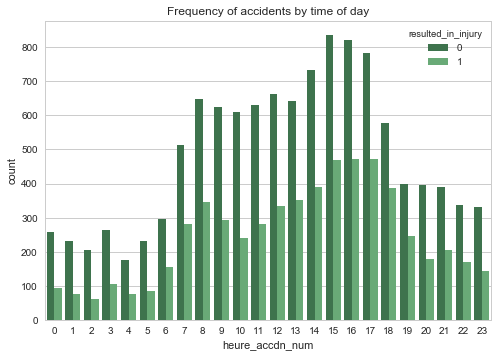

In [22]:
# Time of day histogram
sns.countplot(x='heure_accdn_num', hue='resulted_in_injury', data=mtl, palette='Greens_d')
plt.title('Frequency of accidents by time of day')

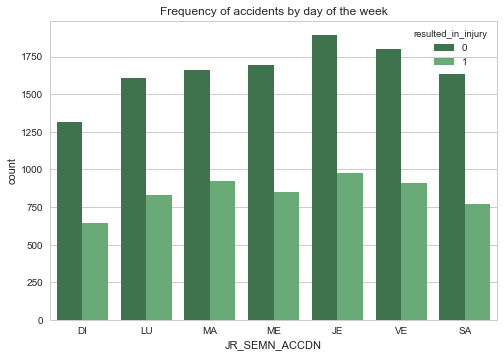

In [23]:
# Day of the week histogram
sns.countplot(x='JR_SEMN_ACCDN', hue='resulted_in_injury', data=mtl, palette='Greens_d')
plt.title('Frequency of accidents by day of the week')

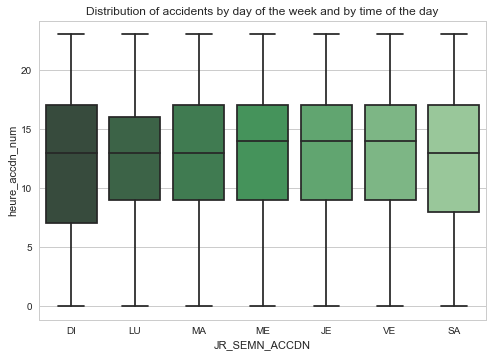

In [24]:
sns.boxplot(x='JR_SEMN_ACCDN', y='heure_accdn_num', data=mtl, palette='Greens_d')
plt.title('Distribution of accidents by day of the week and by time of the day')

In [36]:
# Apply k-NN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target datasets
X = mtl[['heure_accdn_num', 'JR_SEMN_DI', 'JR_SEMN_LU', 'JR_SEMN_MA', 'JR_SEMN_ME', 'JR_SEMN_JE', 
         'JR_SEMN_VE', 'JR_SEMN_SA']]
y = mtl['resulted_in_injury']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.574650299743
